In [ ]:
import gdown
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import warnings
plt.style.use('ggplot')

In [ ]:
url = 'https://drive.google.com/uc?export=download&id=1Yj53OqHQuAOImizb4q7GEW8NFBfInaky'
output = 'Baubap Python Challenge'
gdown.download(url, output, quiet=False)
data = pd.read_csv(output)

Downloading...
From: https://drive.google.com/uc?export=download&id=1Yj53OqHQuAOImizb4q7GEW8NFBfInaky
To: /content/Baubap Python Challenge
100%|██████████| 1.01M/1.01M [00:00<00:00, 41.5MB/s]


**THIS IS SIMULATED DATA FROM A E-LEARNING PLATFORM. EXTRACT THREE BUSINESS INSIGHTS FROM THE DATA**

In [ ]:
data.head(10)

,CustomerID,genero,esEstudiante,casado,tieneHijos,numeroCursosInscritos,antiguidad,haUsadoElServicioBasico,usaServicioBasicoRegularmente,tipoDeUsuario,...,haPagadoContenidoIndividual,haContactoASoporte,usaTabletParaAcceder,usaMovilParaAcceder,tipoDeContrato,pagoDigital,metodoDePago,cargosMensuales,cargosAccumulados,usuarioPerdido
0,7590-VHVEG,Feminino,0,Sí,No,1,1,No,No,Plata,...,No,No,No,No,Mensual,Sí,Transferencia Bancaria,29.85,29.85,0
1,5575-GNVDE,Masculino,0,No,No,4,34,Sí,No,Plata,...,Sí,No,No,No,Trimestral,No,Pago en tienda,56.95,1889.50,0
2,3668-QPYBK,Masculino,0,No,No,1,2,Sí,No,Plata,...,No,No,No,No,Mensual,Sí,Pago en tienda,53.85,108.15,1
3,7795-CFOCW,Masculino,0,No,No,6,45,No,No,Plata,...,Sí,Sí,No,No,Trimestral,No,Transferencia Bancaria (Domiciliado),42.30,1840.75,0
4,9237-HQITU,Feminino,0,No,No,1,2,Sí,No,Oro,...,No,No,No,No,Mensual,Sí,Transferencia Bancaria,70.70,151.65,1
5,9305-CDSKC,Feminino,0,No,No,2,8,Sí,Sí,Oro,...,Sí,No,Sí,Sí,Mensual,Sí,Transferencia Bancaria,99.65,820.50,1
6,1452-KIOVK,Masculino,0,No,Sí,6,22,Sí,Sí,Oro,...,No,No,Sí,No,Mensual,Sí,Tarjeta de credito (Domeciliado,89.10,1949.40,0
7,6713-OKOMC,Feminino,0,No,No,3,10,No,No,Plata,...,No,No,No,No,Mensual,No,Pago en tienda,29.75,301.90,0
8,7892-POOKP,Feminino,0,Sí,No,2,28,Sí,Sí,Oro,...,Sí,Sí,Sí,Sí,Mensual,Sí,Transferencia Bancaria,104.80,3046.05,1
9,6388-TABGU,Masculino,0,No,Sí,10,62,Sí,No,Plata,...,No,No,No,No,Trimestral,No,Transferencia Bancaria (Domiciliado),56.15,3487.95,0


In [ ]:
data.columns

Index(['CustomerID', 'genero', 'esEstudiante', 'casado', 'tieneHijos',
       'numeroCursosInscritos', 'antiguidad', 'haUsadoElServicioBasico',
       'usaServicioBasicoRegularmente', 'tipoDeUsuario',
       'usaServicioPlataRegularmente', 'usaServicioOroRegularmente',
       'haPagadoContenidoIndividual', 'haContactoASoporte',
       'usaTabletParaAcceder', 'usaMovilParaAcceder', 'tipoDeContrato',
       'pagoDigital', 'metodoDePago', 'cargosMensuales', 'cargosAccumulados',
       'usuarioPerdido'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CustomerID                     7043 non-null   object 
 1   genero                         7043 non-null   object 
 2   esEstudiante                   7043 non-null   int64  
 3   casado                         7043 non-null   object 
 4   tieneHijos                     7043 non-null   object 
 5   numeroCursosInscritos          7043 non-null   int64  
 6   antiguidad                     7043 non-null   int64  
 7   haUsadoElServicioBasico        7043 non-null   object 
 8   usaServicioBasicoRegularmente  7043 non-null   object 
 9   tipoDeUsuario                  7043 non-null   object 
 10  usaServicioPlataRegularmente   7043 non-null   object 
 11  usaServicioOroRegularmente     7043 non-null   object 
 12  haPagadoContenidoIndividual    7043 non-null   o

In [ ]:
data.describe()

,esEstudiante,numeroCursosInscritos,antiguidad,cargosMensuales,cargosAccumulados,usuarioPerdido
count,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.162147,5.122391,32.371149,64.761692,2283.300441,0.265370
std,0.368612,3.468413,24.559481,30.090047,2266.771362,0.441561
min,0.000000,1.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,2.000000,9.000000,35.500000,401.450000,0.000000
50%,0.000000,5.000000,29.000000,70.350000,1397.475000,0.000000
75%,0.000000,7.000000,55.000000,89.850000,3794.737500,1.000000
max,1.000000,18.000000,72.000000,118.750000,8684.800000,1.000000


In [ ]:
!pip install sweetviz

                                             |          | [  0%]   00:00 -> (? left)

Report Baubap_Data_Analysis.html was generated.



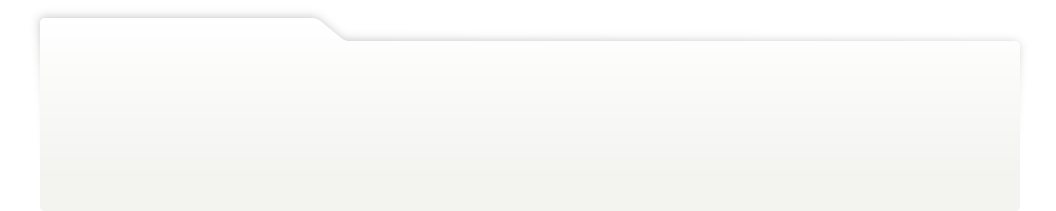
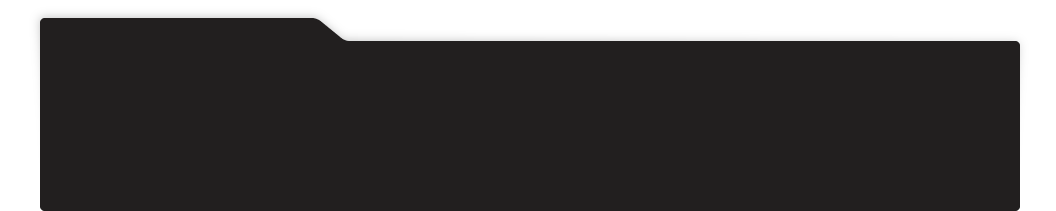
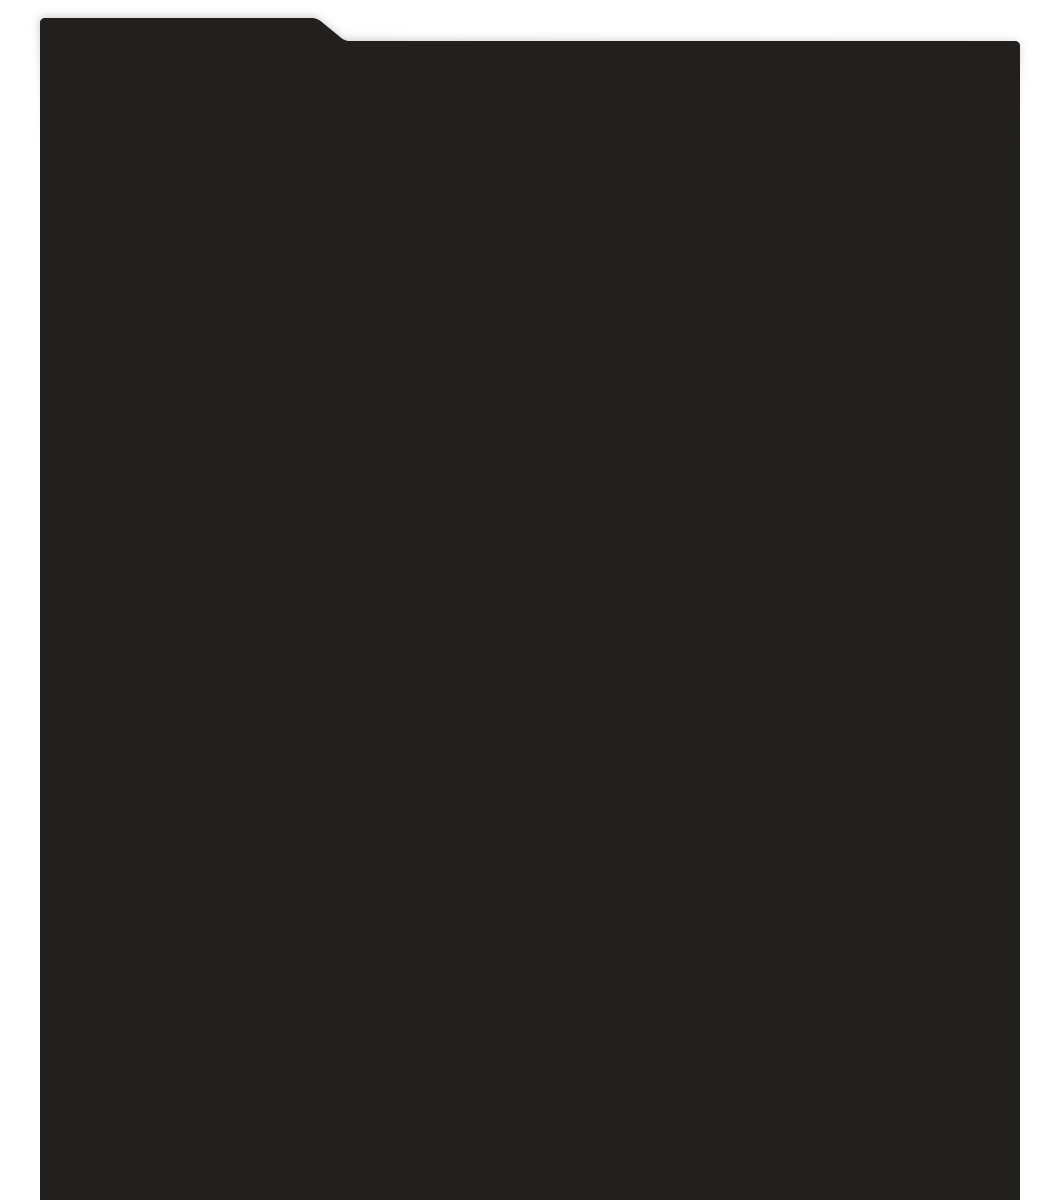
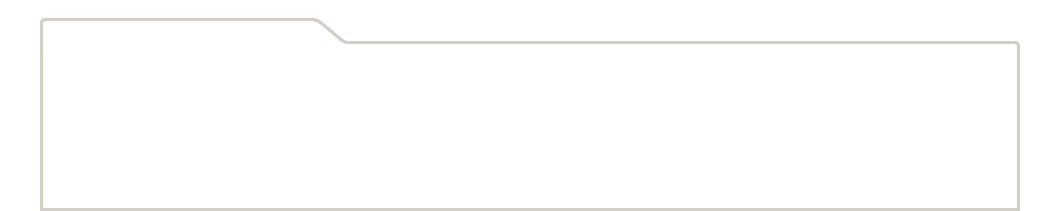
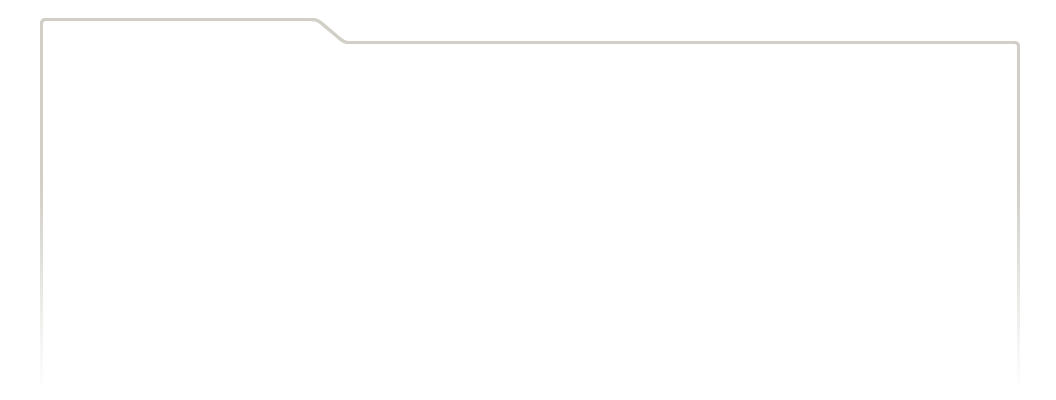
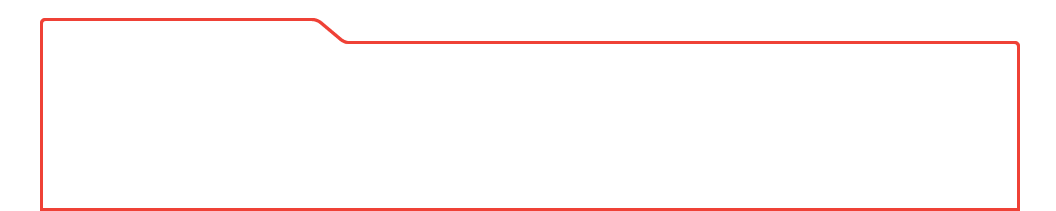
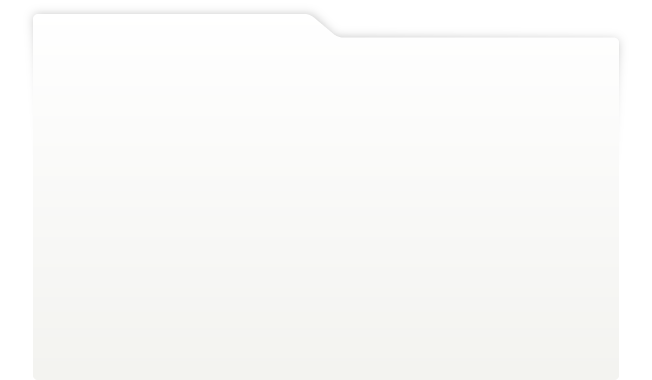
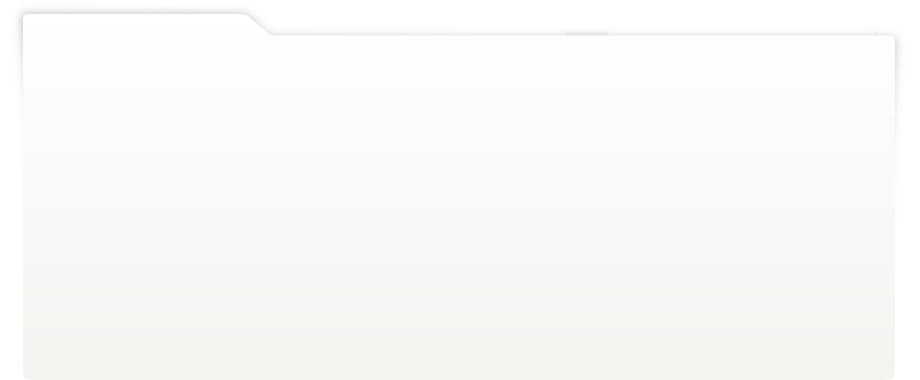
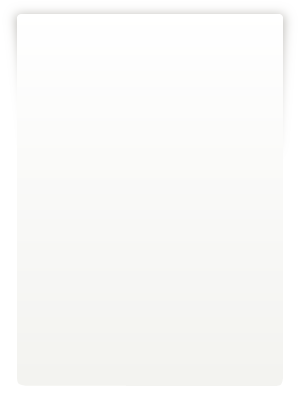
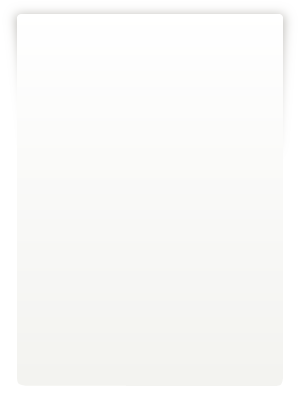
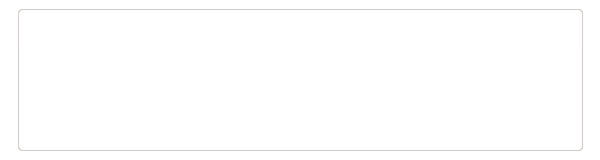
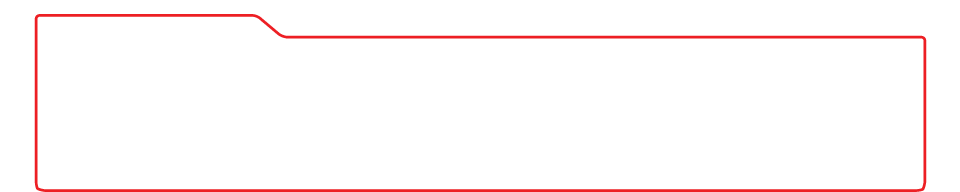
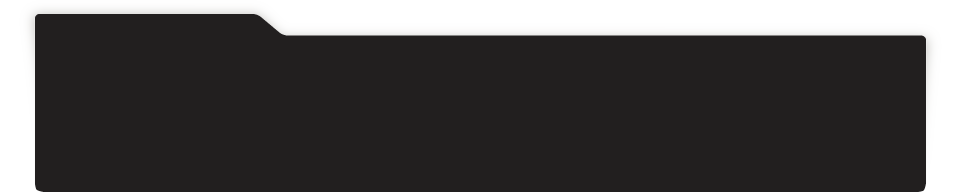
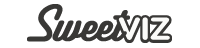
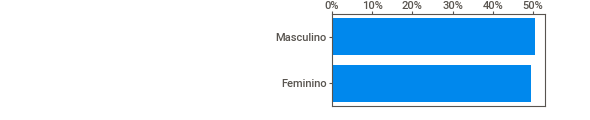
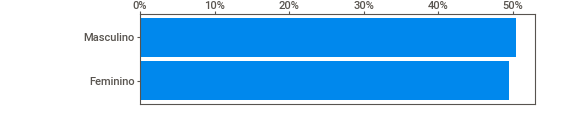
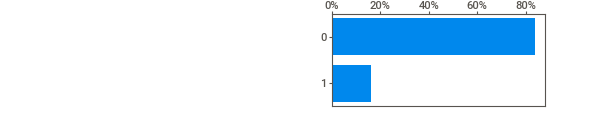
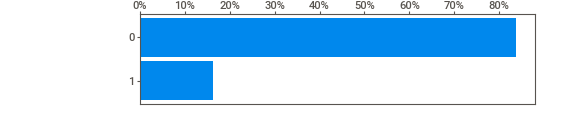
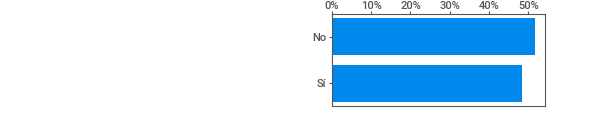
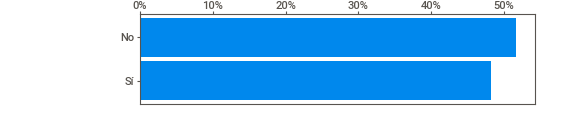
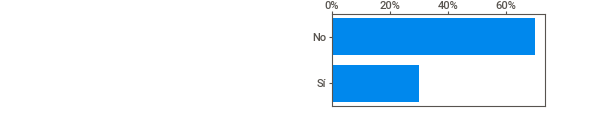
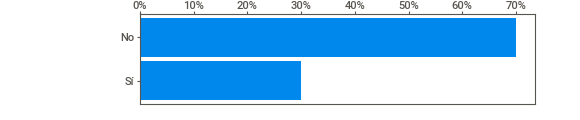
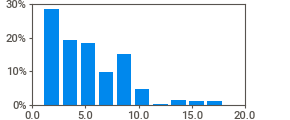
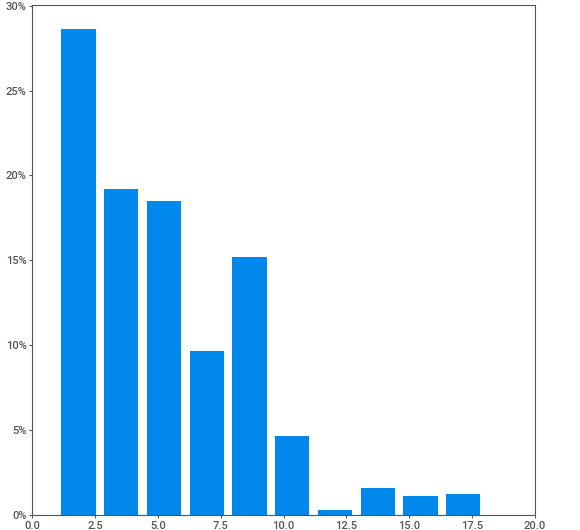
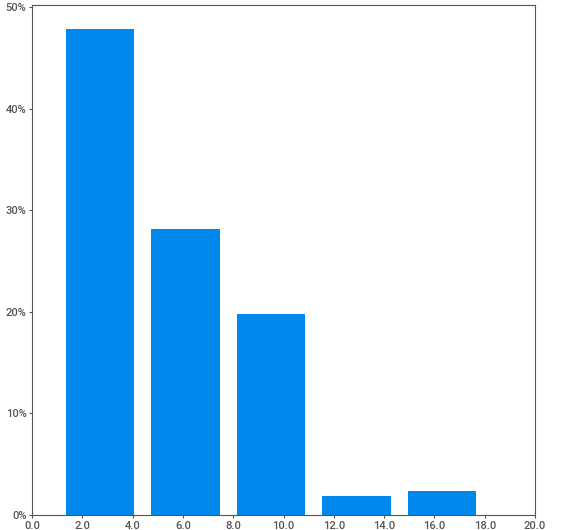
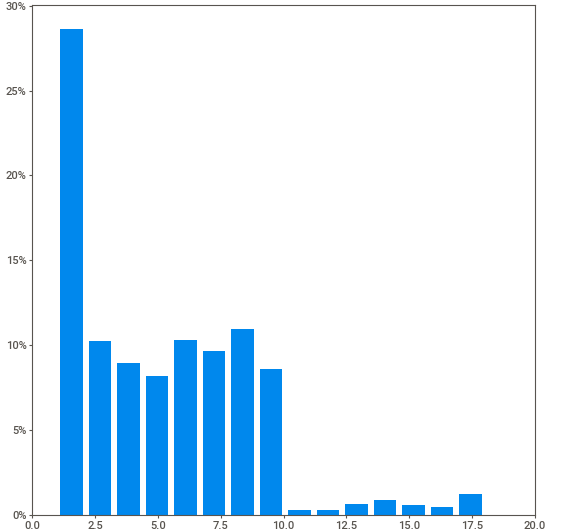
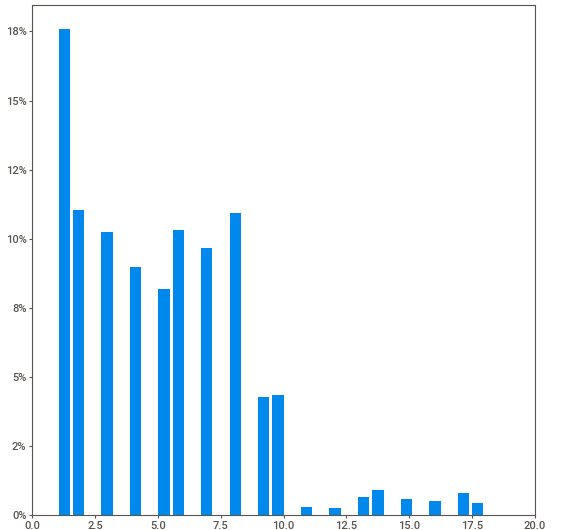
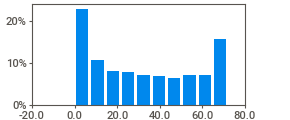
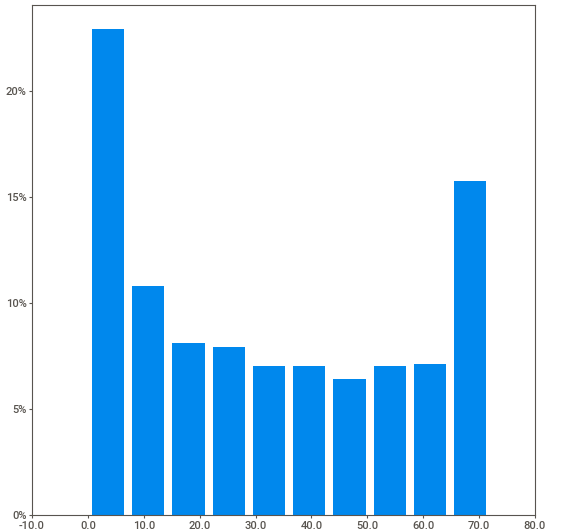
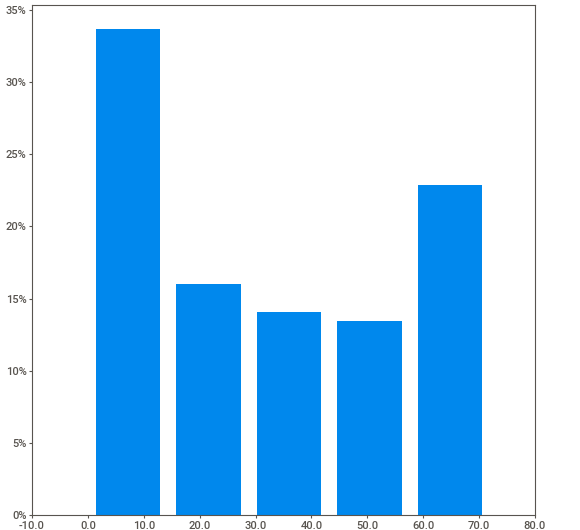
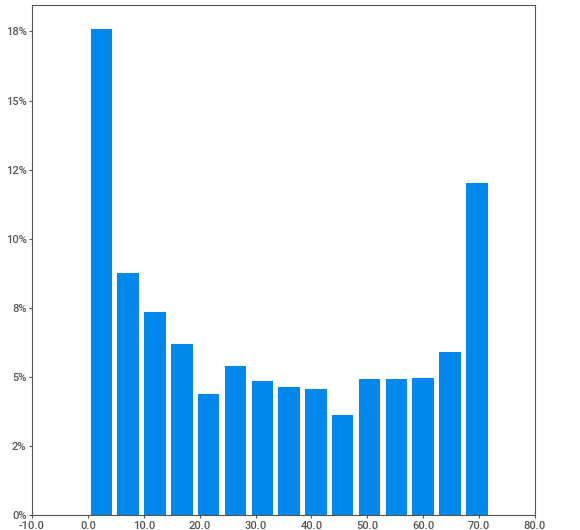
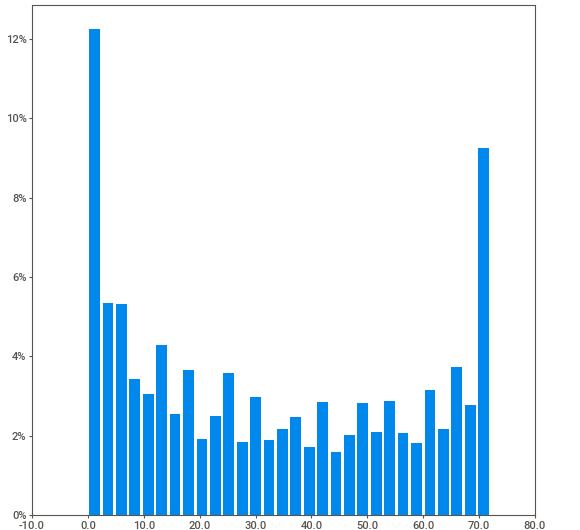
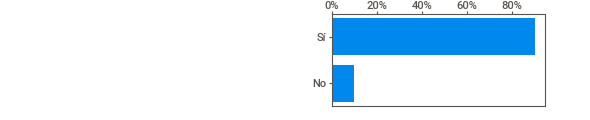
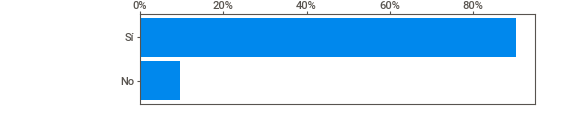
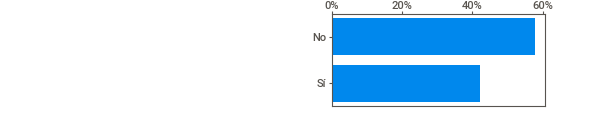
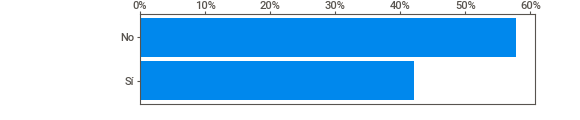
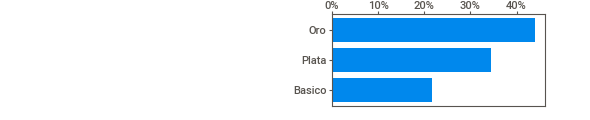
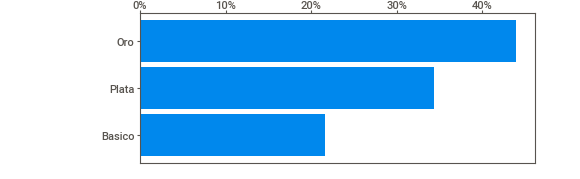
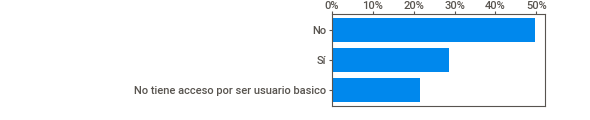
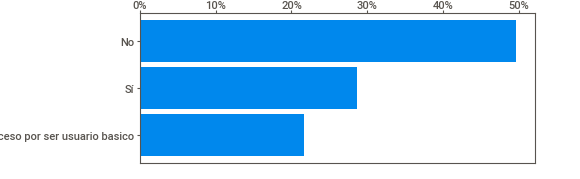
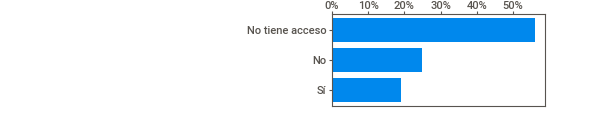
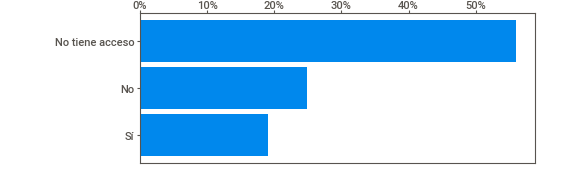
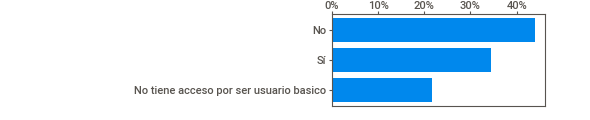
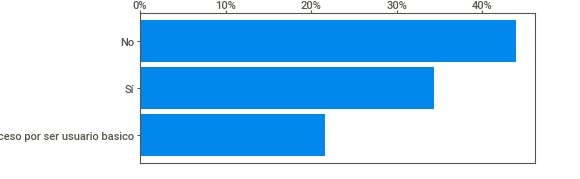
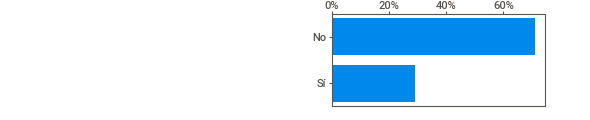
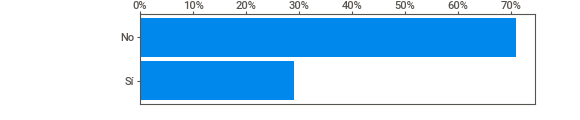
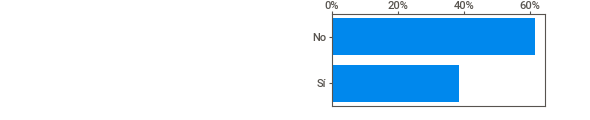
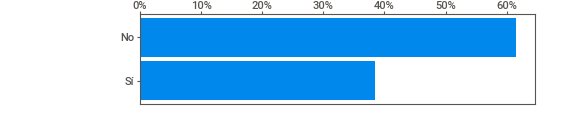
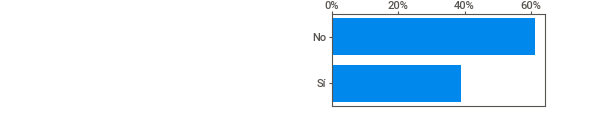
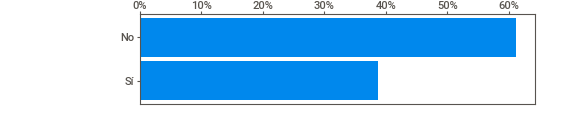
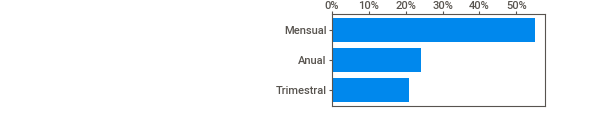
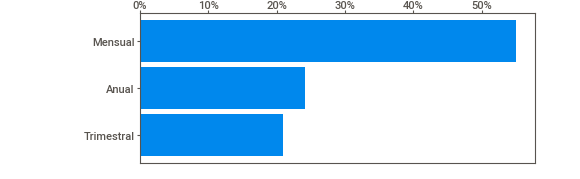
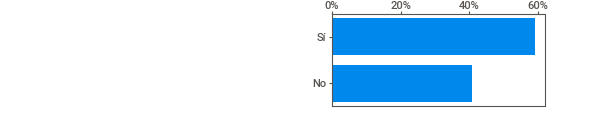
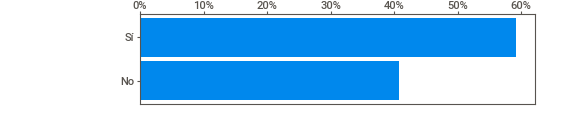
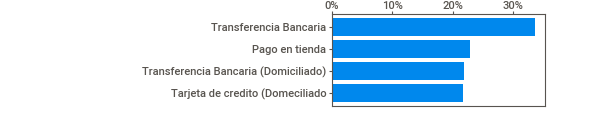
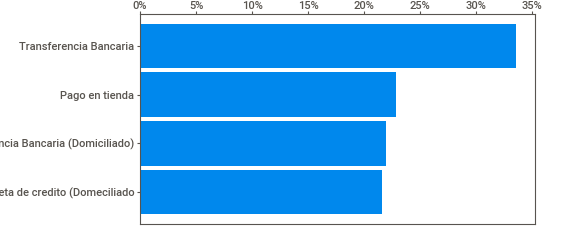
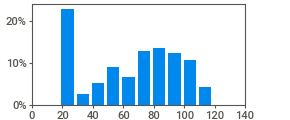
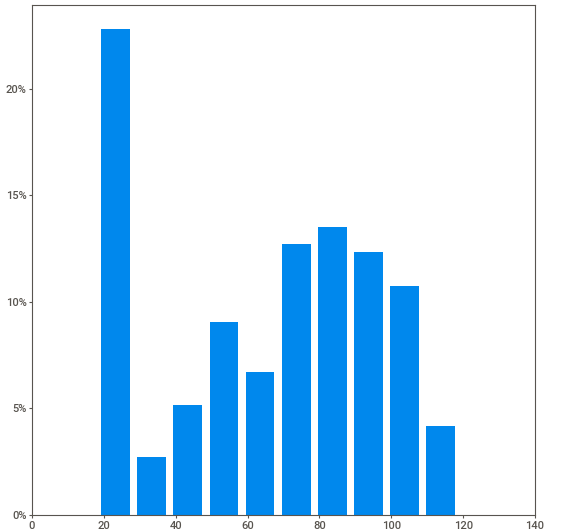
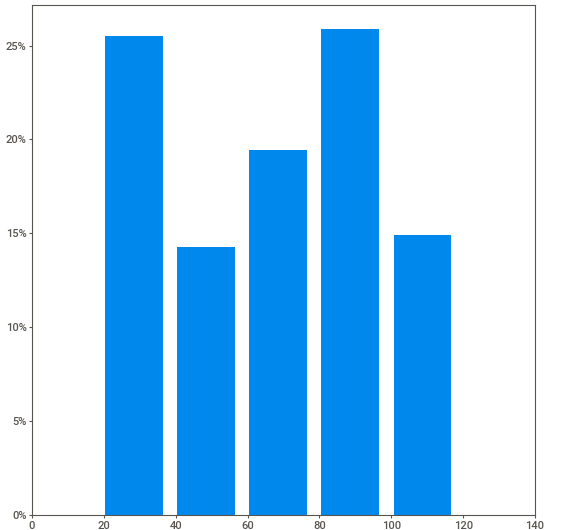
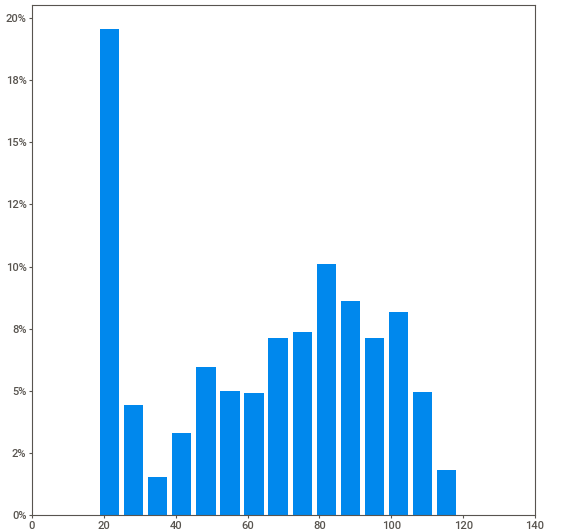
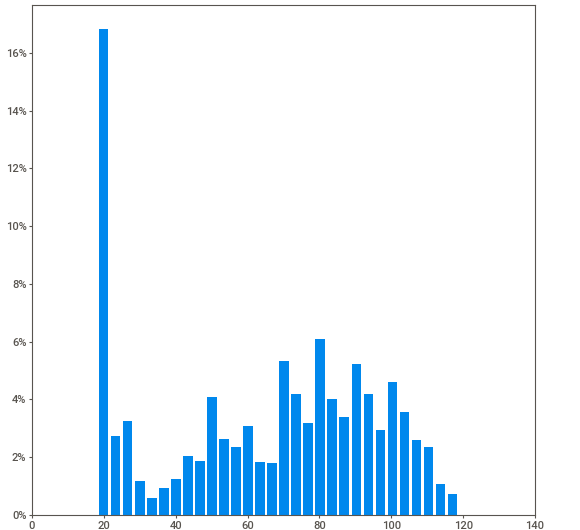
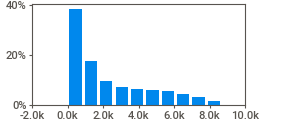
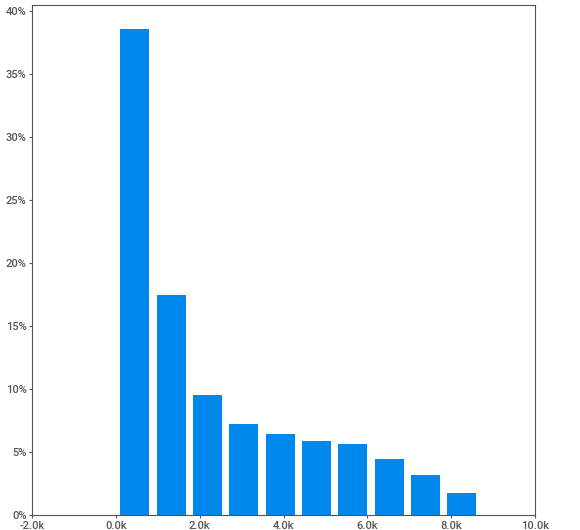
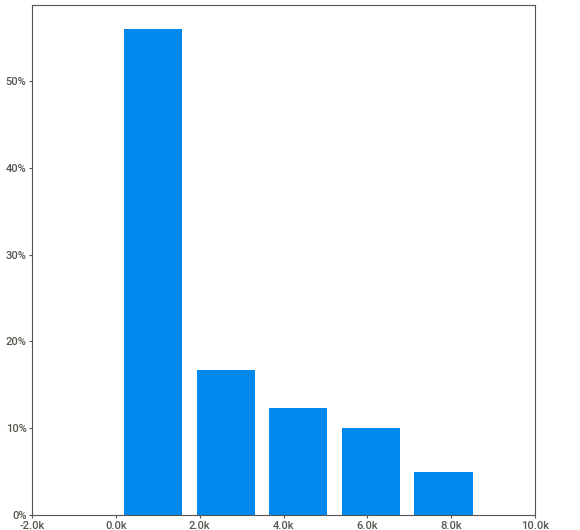
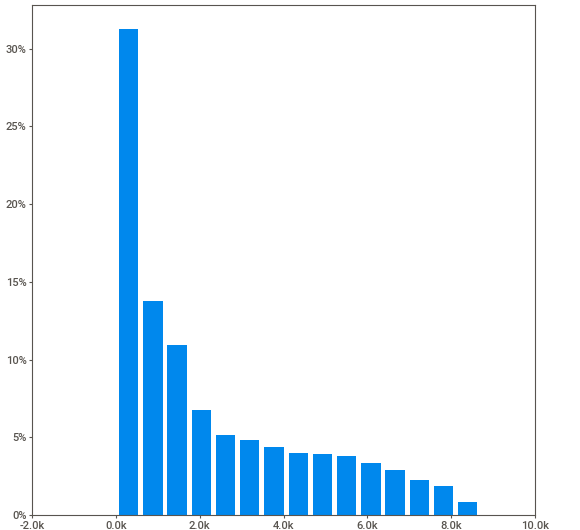
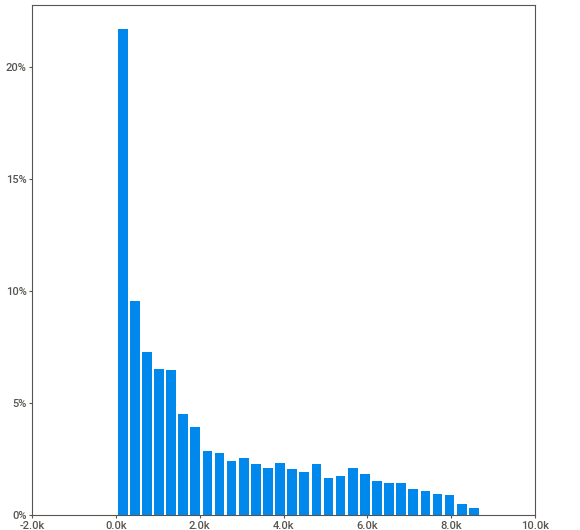
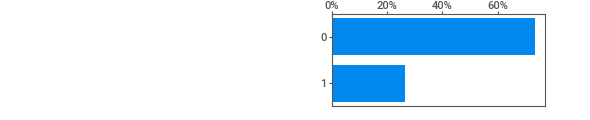
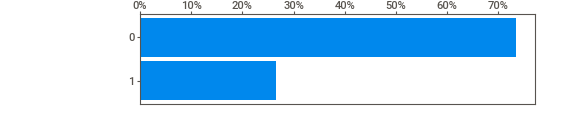
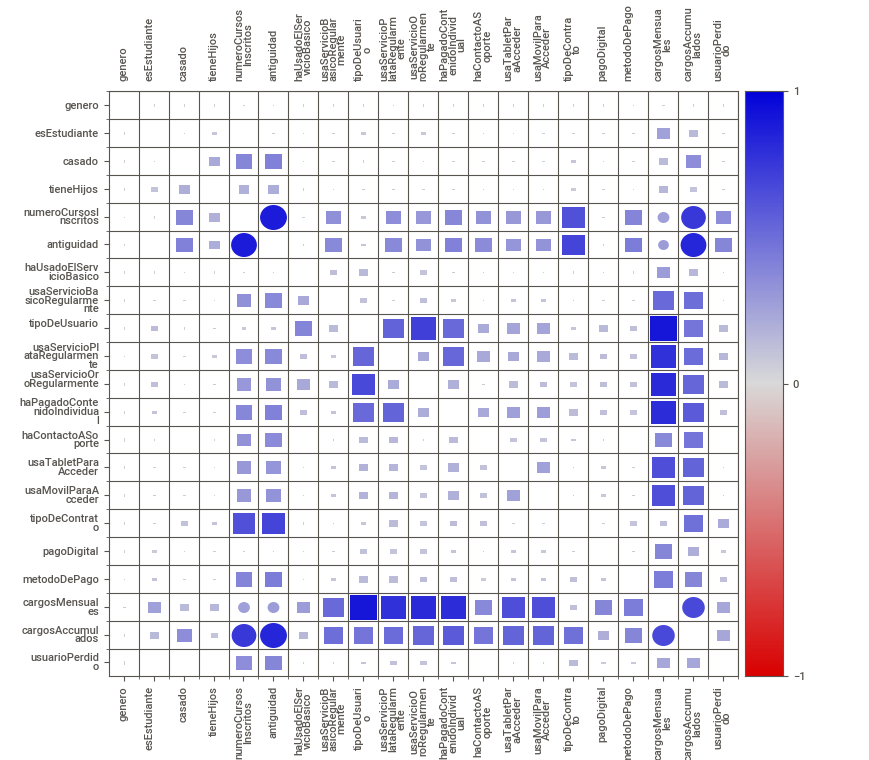
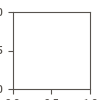

In [ ]:
import sweetviz as sv
import IPython
analyze_report = sv.analyze(data)
analyze_report.show_html('Baubap_Data_Analysis.html', open_browser=False)
IPython.display.HTML('Baubap_Data_Analysis.html')

## Churn Analysis

(LTV - CAC)

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Impute missing values in 'cargosAccumulados' with the median
median_imputer = SimpleImputer(strategy='median')
data['cargosAccumulados'] = median_imputer.fit_transform(data[['cargosAccumulados']])

# Drop the CustomerID column
data = data.drop('CustomerID', axis=1)

# Convert categorical variables to dummy variables, excluding 'target'

features = data.drop(['usuarioPerdido'], axis=1)

data_encoded = pd.get_dummies(features, drop_first=True)

data_encoded['usuarioPerdido'] = data['usuarioPerdido']

# Scale numerical features

features_to_scale = ['numeroCursosInscritos', 'antiguidad', 'cargosMensuales', 'cargosAccumulados']

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the features
data_encoded[features_to_scale] = scaler.fit_transform(data_encoded[features_to_scale])

# Transform esEstudiante into categorical type
data_encoded['esEstudiante'] = data_encoded['esEstudiante'].astype('category')


data_encoded.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column                                                               Non-Null Count  Dtype   
---  ------                                                               --------------  -----   
 0   esEstudiante                                                         7043 non-null   category
 1   numeroCursosInscritos                                                7043 non-null   float64 
 2   antiguidad                                                           7043 non-null   float64 
 3   cargosMensuales                                                      7043 non-null   float64 
 4   cargosAccumulados                                                    7043 non-null   float64 
 5   genero_Masculino                                                     7043 non-null   bool    
 6   casado_Sí                                                            7043 non-null   bool    
 7

In [ ]:
!pip install PyCaret

In [ ]:
from pycaret.classification import *

np.seterr(all='ignore')

# PyCaret experiment setup
exp_clf = setup(data_encoded, target='usuarioPerdido', session_id=42)

# Compare Best models
best = compare_models()
evaluate_model(best)

,Description,Value
0,Session id,42
1,Target,usuarioPerdido
2,Target type,Binary
3,Original data shape,"(7043, 28)"
4,Transformed data shape,"(7043, 28)"
5,Transformed train set shape,"(4930, 28)"
6,Transformed test set shape,"(2113, 28)"
7,Numeric features,4
8,Categorical features,1
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8047,0.8465,0.5337,0.6655,0.5918,0.4655,0.4708,0.9390
ada,Ada Boost Classifier,0.8024,0.8451,0.5406,0.6561,0.5920,0.4634,0.4676,0.3500
lr,Logistic Regression,0.8022,0.8450,0.5444,0.6552,0.5937,0.4646,0.4687,0.7310
ridge,Ridge Classifier,0.8004,0.8374,0.5161,0.6597,0.5783,0.4502,0.4565,0.0930
lda,Linear Discriminant Analysis,0.7970,0.8374,0.5536,0.6367,0.5914,0.4573,0.4598,0.1020
lightgbm,Light Gradient Boosting Machine,0.7921,0.8362,0.5230,0.6327,0.5718,0.4362,0.4402,0.5690
svm,SVM - Linear Kernel,0.7892,0.8314,0.5345,0.6380,0.5576,0.4270,0.4391,0.1130
rf,Random Forest Classifier,0.7842,0.8273,0.4771,0.6237,0.5396,0.4020,0.4088,0.8400
xgboost,Extreme Gradient Boosting,0.7832,0.8231,0.5108,0.6101,0.5554,0.4136,0.4169,0.3370
et,Extra Trees Classifier,0.7777,0.8026,0.4810,0.6041,0.5341,0.3908,0.3960,0.6740


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 6.5 MB/s eta 0:00:00


In [ ]:
import optuna
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

X = data_encoded.drop('usuarioPerdido', axis=1)  # Predictors
y = data_encoded['usuarioPerdido']  # Response variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


def objective(trial):
    # Hyperparameters based on PyCaret outcome
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),  # explorar alrededor de 100
        'max_depth': trial.suggest_int('max_depth', 1, 10),  # explorar alrededor de 3
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),  # explorar alrededor de 2
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5),  # explorar alrededor de 1
        'learning_rate': trial.suggest_float('learning_rate', 0.05, 0.2),  # explorar alrededor de 0.1
        'subsample': trial.suggest_float('subsample', 0.8, 1.0),  # explorar alrededor de 1.0
        'max_features': trial.suggest_categorical('max_features', [None, 'sqrt', 'log2'])  # explorar alrededor de None
    }

    # Model Trainning
    model = GradientBoostingClassifier(**params, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # f1 Score calculation
    f1 = f1_score(y_test, y_pred)
    return f1

# Optuna study creation and excecution
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Optuna outcomes
print("Mejores hiperparámetros encontrados:")
print(study.best_params)
print("F1 score correspondiente:", study.best_value)

[I 2024-04-18 03:36:07,437] A new study created in memory with name: no-name-2f6f8872-a40f-4a5b-a477-e4c82a12d181
[I 2024-04-18 03:36:10,847] Trial 0 finished with value: 0.5582290664100096 and parameters: {'n_estimators': 221, 'max_depth': 6, 'min_samples_split': 2, 'min_samples_leaf': 4, 'learning_rate': 0.13816800576533245, 'subsample': 0.9963112465697258, 'max_features': 'log2'}. Best is trial 0 with value: 0.5582290664100096.
[I 2024-04-18 03:36:11,509] Trial 1 finished with value: 0.5742379547689282 and parameters: {'n_estimators': 83, 'max_depth': 6, 'min_samples_split': 6, 'min_samples_leaf': 4, 'learning_rate': 0.12474336898036634, 'subsample': 0.8155639517963212, 'max_features': 'log2'}. Best is trial 1 with value: 0.5742379547689282.
[I 2024-04-18 03:36:13,016] Trial 2 finished with value: 0.5562015503875969 and parameters: {'n_estimators': 101, 'max_depth': 8, 'min_samples_split': 3, 'min_samples_leaf': 2, 'learning_rate': 0.12347554764928946, 'subsample': 0.969553592515969

Mejores hiperparámetros encontrados:
{'n_estimators': 216, 'max_depth': 3, 'min_samples_split': 2, 'min_samples_leaf': 4, 'learning_rate': 0.06454582325948158, 'subsample': 0.9022354674553085, 'max_features': 'sqrt'}
F1 score correspondiente: 0.6111655239960823


In [ ]:
from sklearn.metrics import classification_report

# Create the model with the optimized hyperparameters
hyperparams = {
    'n_estimators': 216,
    'max_depth': 3,
    'min_samples_split': 2,
    'min_samples_leaf': 4,
    'learning_rate': 0.06454582325948158,
    'subsample': 0.9022354674553085,
    'max_features': 'sqrt',
    'random_state': 42
}

model = GradientBoostingClassifier(**hyperparams)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

# Get feature importances
feature_importances = model.feature_importances_

# Transform the feature importances into a readable format
feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the dataframe to show the most important features at the top
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Display feature importances
print(feature_importances_df)


              precision    recall  f1-score   support

           0       0.84      0.91      0.88      1539
           1       0.70      0.54      0.61       574

    accuracy                           0.81      2113
   macro avg       0.77      0.73      0.74      2113
weighted avg       0.80      0.81      0.80      2113

                                              Feature  Importance
21                             tipoDeContrato_Mensual    0.181707
2                                          antiguidad    0.150655
1                               numeroCursosInscritos    0.116628
4                                   cargosAccumulados    0.092593
10                                  tipoDeUsuario_Oro    0.091352
14         usaServicioOroRegularmente_No tiene acceso    0.090509
3                                     cargosMensuales    0.054555
25                metodoDePago_Transferencia Bancaria    0.047898
16  haPagadoContenidoIndividual_No tiene acceso po...    0.036392
13           

Given the significance of features on customer churn, a detailed analysis will be conducted on the following features and their correlation with churn: Tipo de contrato, Antiguedad, Numero de cursos inscritos, Cargos Acumulados and Tipos de Usuario

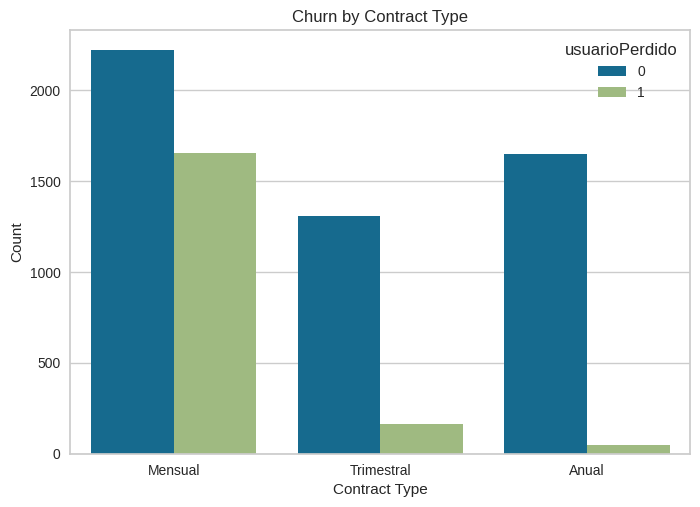

In [ ]:
sns.countplot(x='tipoDeContrato', hue='usuarioPerdido', data=data)
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()

 Los compromisos a corto plazo pueden estar asociados con una menor retención de clientes

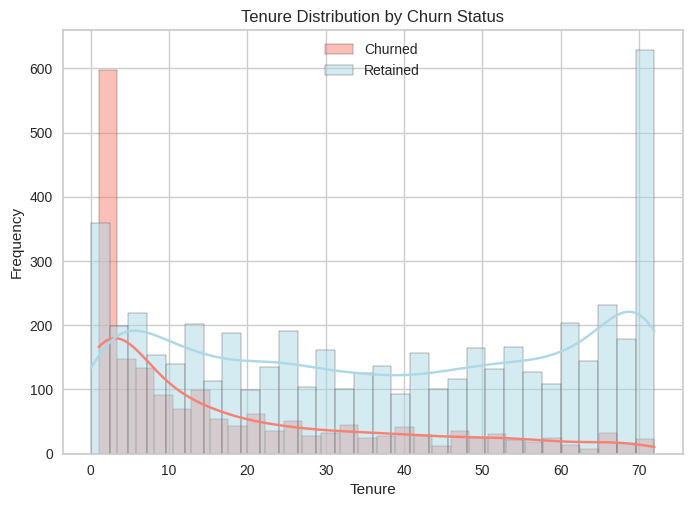

In [ ]:
sns.histplot(data[data['usuarioPerdido']==1]['antiguidad'], bins=30, kde=True, color='salmon', label='Churned')
sns.histplot(data[data['usuarioPerdido']==0]['antiguidad'], bins=30, kde=True, color='lightblue', label='Retained')
plt.title('Tenure Distribution by Churn Status')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Los usuarios más nuevos son más propensos a abandonar. Esto puede implicar la necesidad de mejorar la experiencia inicial del usuario o reforzar la inducción y el engagement durante los primeros días-meses.

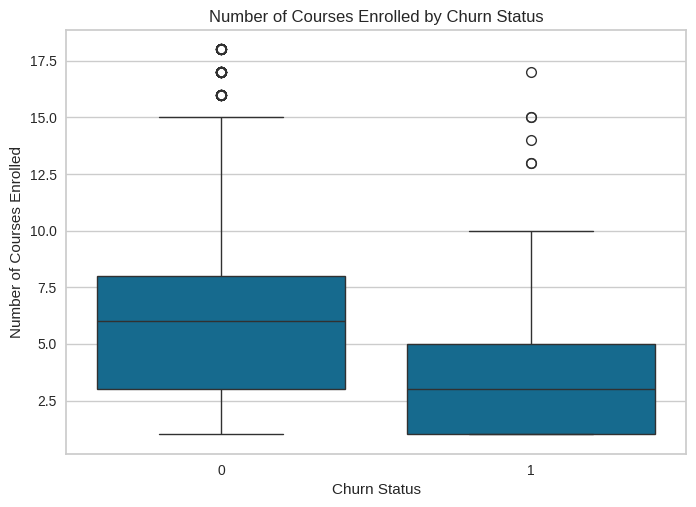

In [ ]:
sns.boxplot(x='usuarioPerdido', y='numeroCursosInscritos', data=data)
plt.title('Number of Courses Enrolled by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Number of Courses Enrolled')
plt.show()

Un menor engagement con la oferta de cursos está relacionado con un mayor riesgo de pérdida.

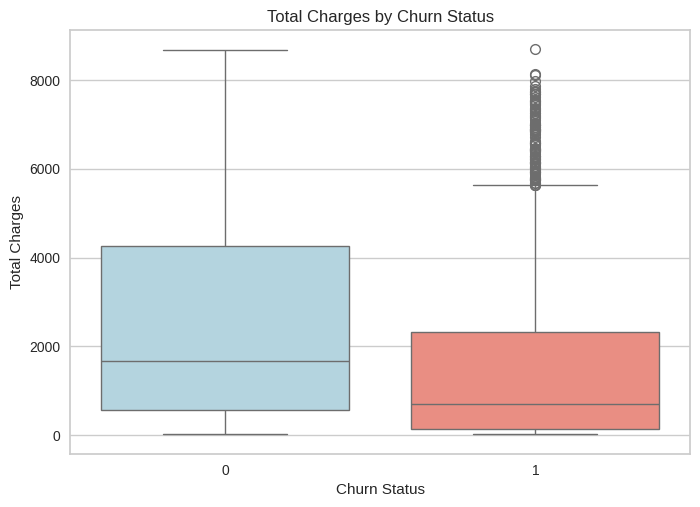

In [ ]:
sns.boxplot(x='usuarioPerdido', y='cargosAccumulados', data=data, palette=palette)
plt.title('Total Charges by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Total Charges')
plt.show()

Puede indicar un menor uso general del servicio antes de dejarlo (comparaciones temporales)

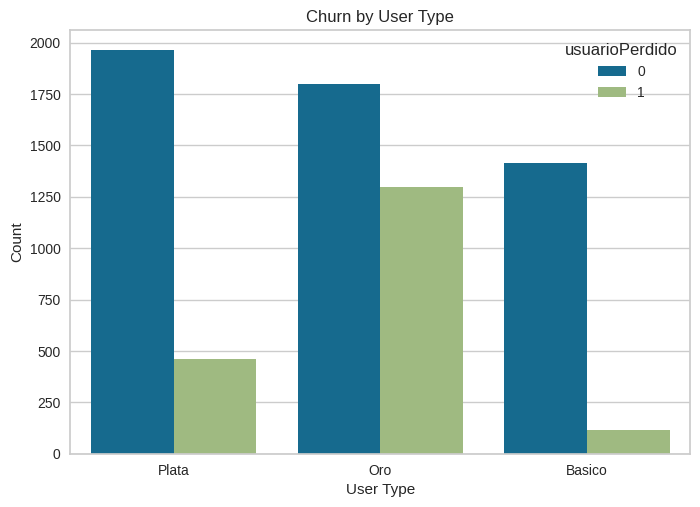

In [ ]:
sns.countplot(x='tipoDeUsuario', hue='usuarioPerdido', data=data)
plt.title('Churn by User Type')
plt.xlabel('User Type')
plt.ylabel('Count')
plt.show()

In [ ]:
churned_users = data[data['usuarioPerdido'] == 1]
oro_churn_percentage = (churned_users[churned_users['tipoDeUsuario'] == 'Oro'].shape[0] / churned_users.shape[0]) * 100
oro_churn_percentage

69.39539860888175

El 69.4% de todos los usuarios que se han dado de baja (churned) pertenecen al nivel "Oro". Este es un porcentaje significativamente alto; lo que sugiere que pueden estar enfrentando problemas específicos o insatisfacciones con ese nivel de servicio

# Bussines Insights

1. **Mejorar la experiencia para usuarios de tipo Oro**: La alta tasa de churn entre los usuarios Oro es preocupante, especialmente dado que este grupo probablemente paga más o tiene acceso a más servicios. Investigar las razones detrás de esta insatisfacción, ya sea mediante encuestas, grupos focales o análisis de uso de servicio (behavior), puede proporcionar insights para mejorar la retención. Estrategias como ajustes en la estructuración de precios, mejoras en las características exclusivas, o incluso programas de lealtad mejorados pueden ser efectivos.
2. **Estrategias de fidelización enfocadas en los primeros dias-meses**: La antigüedad es un factor crítico, con usuarios más nuevos mostrando mayor propensión a dejar el servicio. Desarrollar un robusto programa de onboarding que eduque a los nuevos usuarios sobre todos los beneficios y características disponibles puede ayudar a mejorar la retención inicial.
3. **Revisión de los contratos mensuales**: Dado que los usuarios con contratos mensuales muestran una tasa de churn significativamente más alta, revisar las condiciones de estos contratos o incentivar transiciones a contratos más largos podría ser beneficioso. Ofrecer promociones o descuentos al optar por contratos anuales o trimestrales puede reducir la tasa de churn.